In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
new_data = pd.read_csv('new_data.csv')

In [ ]:
####---DESCRIBING THE DATASET

In [2]:
new_data = new_data.drop('Unnamed: 0',axis=1) #drop unnecessary extra indexing column

In [4]:
new_data

,Unnamed: 0,song,year,artist,genre,lyrics,sex
0,0,my-elusive-dreams,1970,bobby-vinton,Pop,"You followed me to Texas,\nYou followed me to ...",M
1,1,baby-i-m-yours,1970,bobby-vinton,Pop,Baby I'm yours\nBaby I'm yours\nAnd I'll be yo...,M
2,2,raindrops-keep-fallin-on-my-head,1970,bobby-vinton,Pop,Raindrops keep falling on my head\nAnd just li...,M
3,3,god-only-knows,1970,beach-boys,Rock,I may not always love you\nBut long as there a...,M
4,4,their-hearts-were-full-of-spring,1970,beach-boys,Rock,There's a story told of a very gentle boy\nAnd...,M
...,...,...,...,...,...,...,...
119361,119361,country-ain-t-never-been-pretty,2015,cam,Other,Her high heels on the red carpet\nHer perfect ...,F
119362,119362,runaway-train,2015,cam,Other,I always knew that you were hiding something f...,F
119363,119363,want-it-all,2015,cam,Other,"Been a-sittin' 'round a coward, broken all tha...",F
119364,119364,pocket-full-of-keys,2015,dale-ann-bradley,Country,"He has one that locks the office,\nAnd there's...",F


In [4]:
#looking at sex as the main component of our analysis
new_data['sex'].describe()

count     119366
unique         2
top            M
freq       86319
Name: sex, dtype: object

In [37]:
new_data.groupby(['sex']).artist.nunique()

sex
F    1704
M    3458
Name: artist, dtype: int64

In [5]:
#looking at year as the other main component of our analysis
new_data['year'].describe()

count    119366.000000
mean       2007.644857
std           5.572305
min        1970.000000
25%        2006.000000
50%        2007.000000
75%        2011.000000
max        2016.000000
Name: year, dtype: float64

In [6]:
#additional metadata (potentially to control for later)
new_data['genre'].describe()

count     119366
unique        12
top         Rock
freq       41140
Name: genre, dtype: object

In [38]:
new_data.groupby(['sex']).genre.nunique()

sex
F    12
M    12
Name: genre, dtype: int64

In [7]:
#additional metadata (potentially to control for later)
new_data['artist'].describe()

count     119366
unique      5162
top       eminem
freq        1150
Name: artist, dtype: object

In [27]:
new_data['artist'].nunique()

5162

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

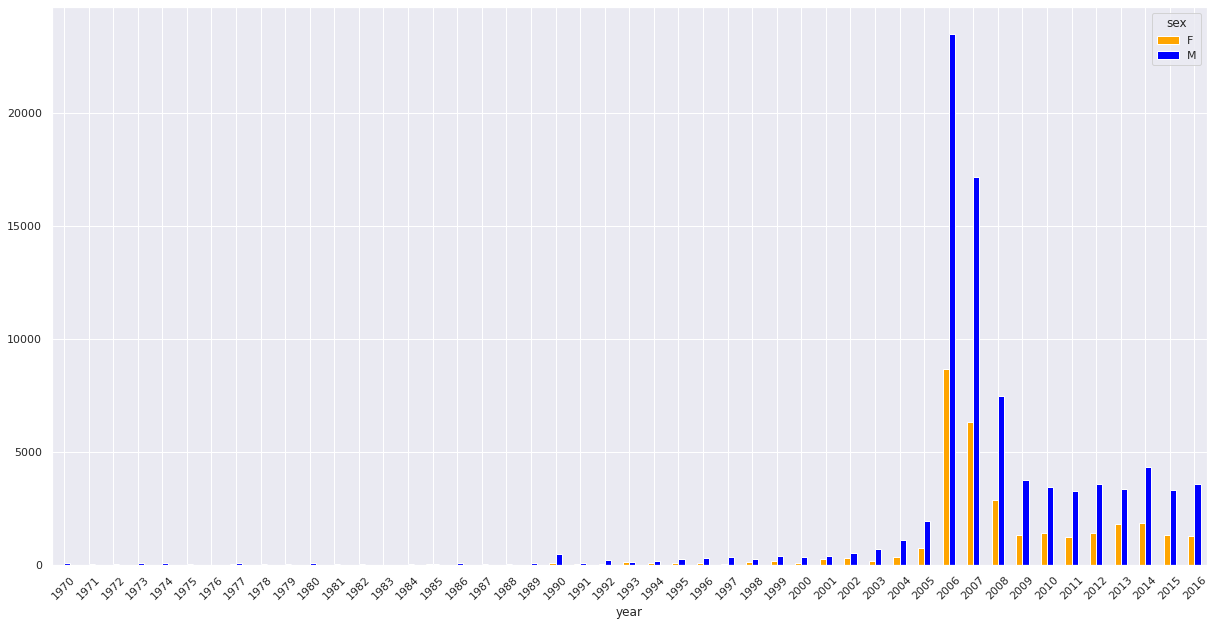

In [8]:
#plotting number of songs by sex over time
song_sex_year = new_data.groupby(['year', 'sex']).song.count()

sns.set(rc={'figure.figsize':(20.7,10.27)})
song_sex_year.unstack(level=1).plot(kind='bar', color=['orange','blue'])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

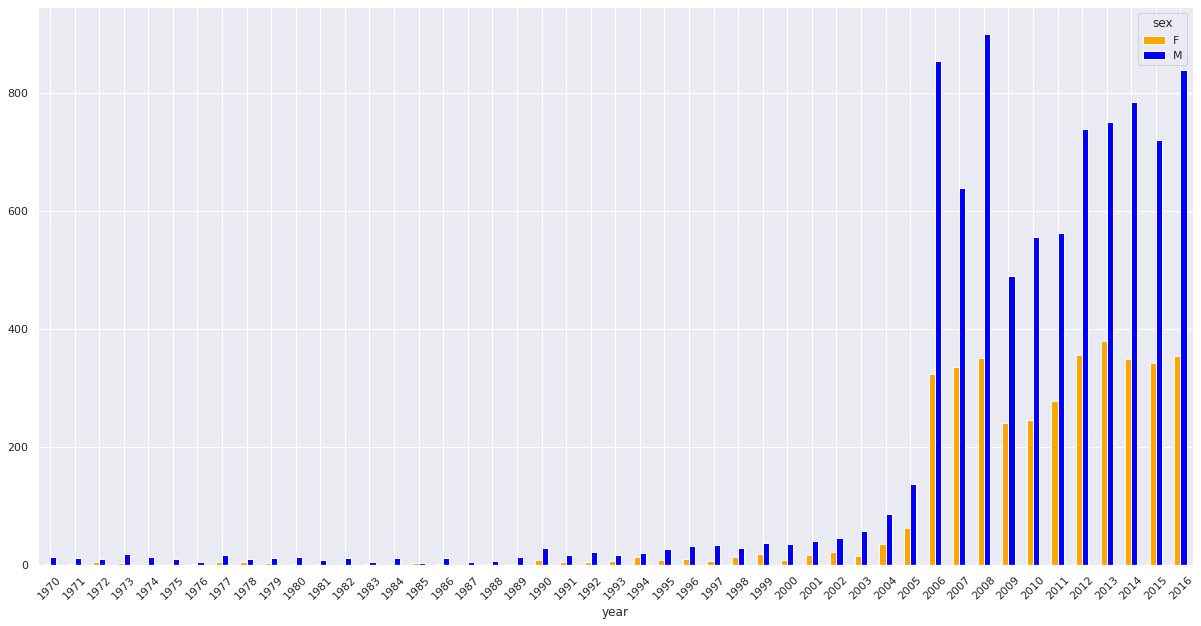

In [9]:
#number of artists by sex over time
art_sex_year = new_data.groupby(['year', 'sex']).artist.nunique()

sns.set(rc={'figure.figsize':(20.7,10.27)})
art_sex_year.unstack(level=1).plot(kind='bar', color=['orange','blue'])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

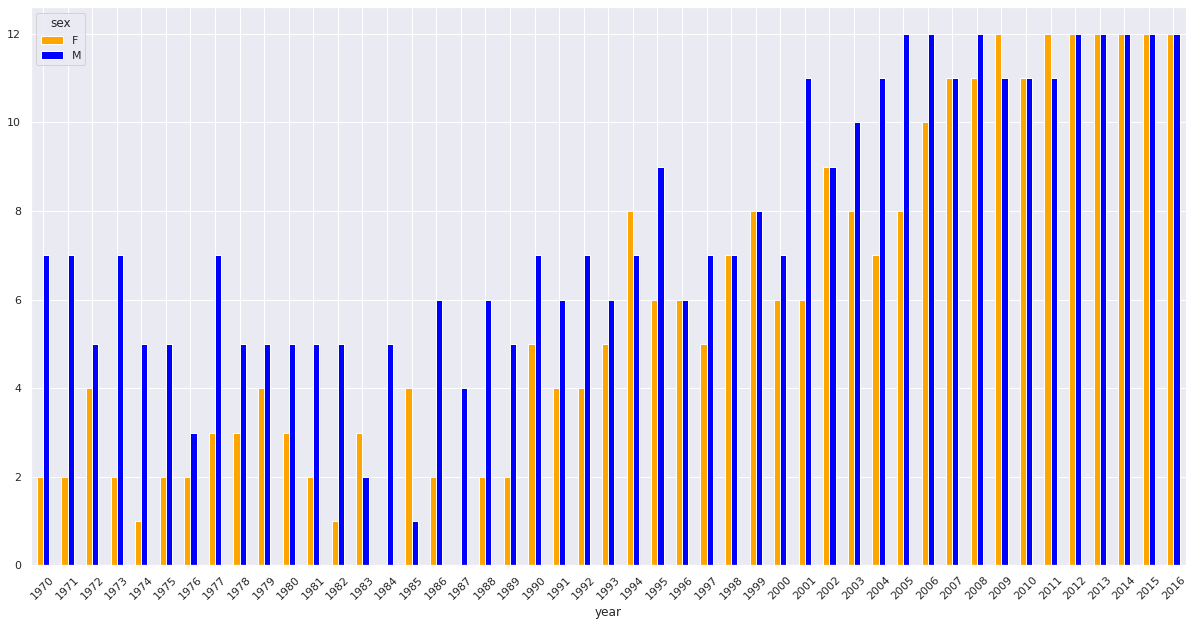

In [10]:
#number of unique genres by sex over time
genre_sex_year = new_data.groupby(['year', 'sex']).genre.nunique()

sns.set(rc={'figure.figsize':(20.7,10.27)})
genre_sex_year.unstack(level=1).plot(kind='bar', color=['orange','blue'])
plt.xticks(rotation=45)

(array([1960., 1970., 1980., 1990., 2000., 2010., 2020.]),
 <a list of 7 Text major ticklabel objects>)

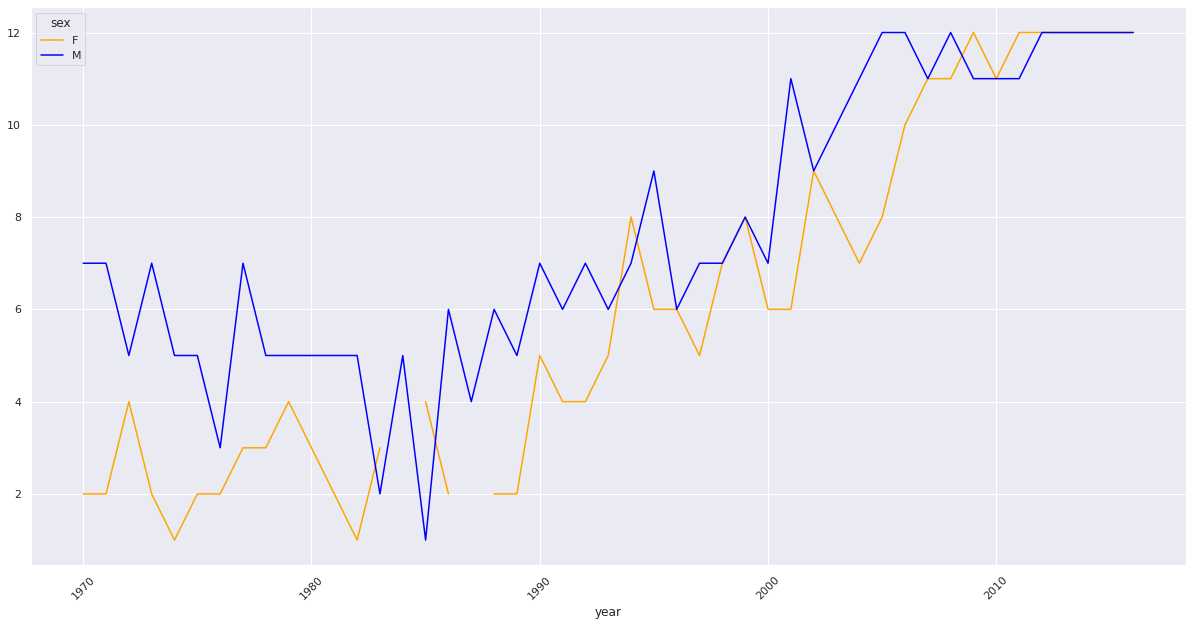

In [11]:
#line plot of the same: number of unique genres by sex over time
sns.set(rc={'figure.figsize':(20.7,10.27)})
genre_sex_year.unstack(level=1).plot(color=['orange','blue'])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

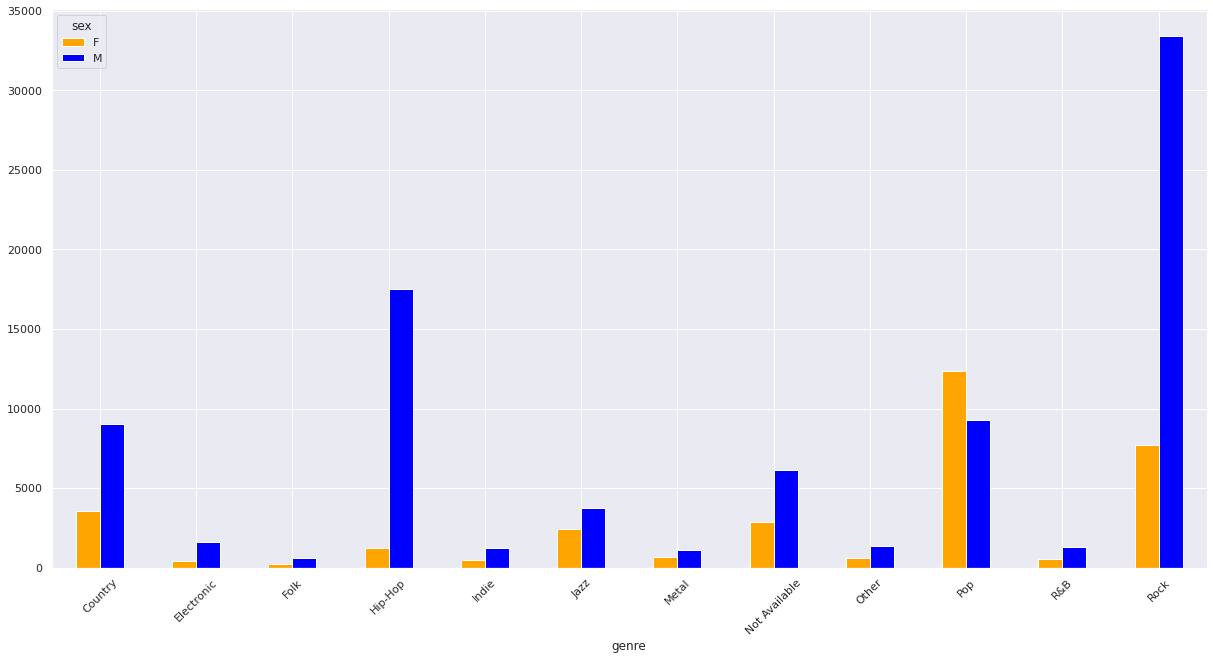

In [12]:
#number of songs of each genre by sex
songs_genre = new_data.groupby(['genre', 'sex']).song.count()

sns.set(rc={'figure.figsize':(20.7,10.27)})
songs_genre.unstack(level=1).plot(kind='bar', color=['orange','blue'])
plt.xticks(rotation=45)

In [20]:
#plotting number of genres over time
genre_year = new_data.groupby(['year', 'genre']).song.count() / new_data.groupby(['year']).song.count()
#total_year = new_data.groupby(['year']).song.count()

genre_year

year  genre        
1970  Country          0.039604
      Jazz             0.128713
      Not Available    0.079208
      Other            0.059406
      Pop              0.039604
                         ...   
2016  Not Available    0.038895
      Other            0.144933
      Pop              0.169703
      R&B              0.019652
      Rock             0.202661
Name: song, Length: 386, dtype: float64

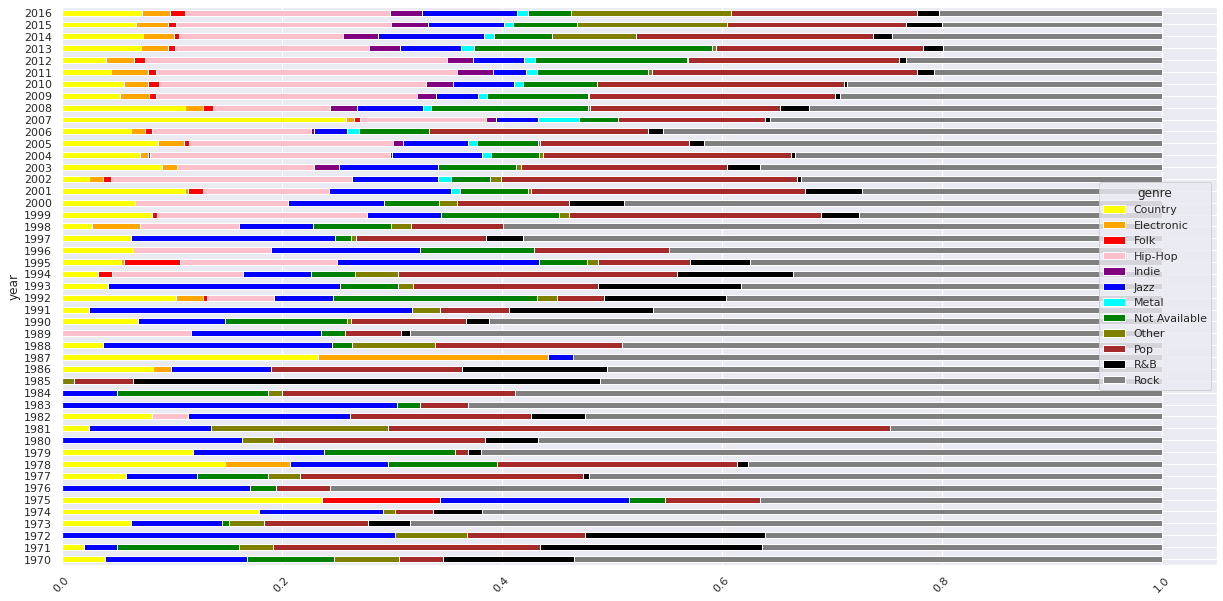

In [25]:
sns.set(rc={'figure.figsize':(20.7,10.27)})
genre_year.unstack(level=1).plot(kind='barh', stacked=True, color=['yellow','orange','red','pink','purple','blue','cyan','green','olive','brown','black','grey'])
plt.xticks(rotation=45)
plt.show()

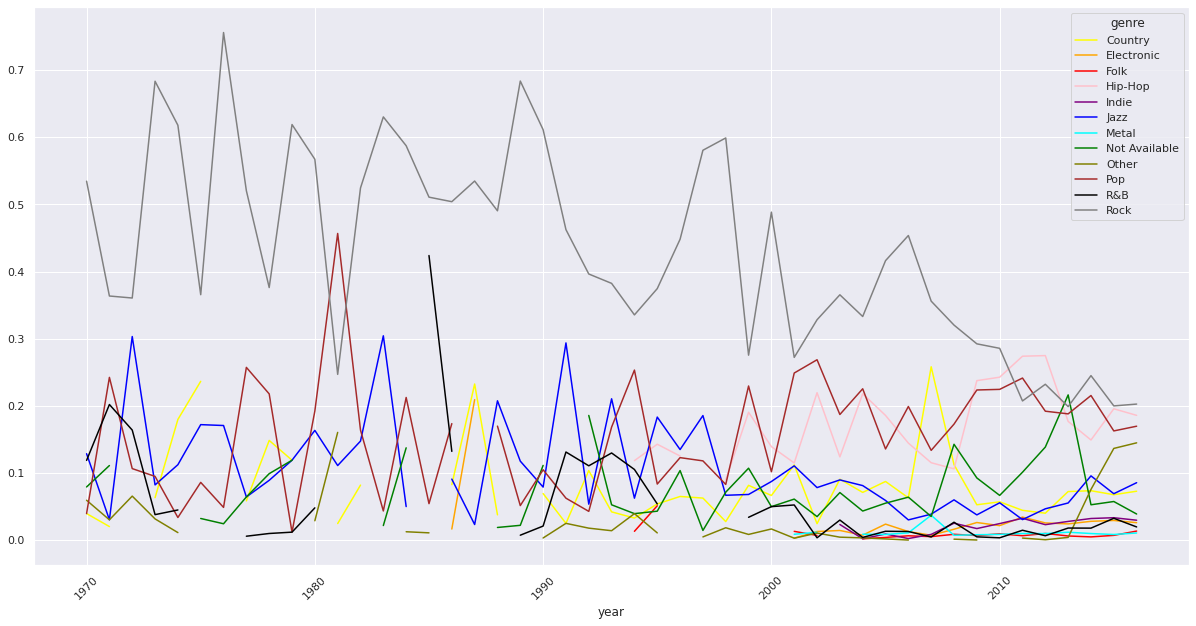

In [26]:
sns.set(rc={'figure.figsize':(20.7,10.27)})
genre_year.unstack(level=1).plot(color=['yellow','orange','red','pink','purple','blue','cyan','green','olive','brown','black','grey'])
plt.xticks(rotation=45)
plt.show()

In [19]:
new_data[new_data['artist']=='selena-gomez']

,Unnamed: 0,song,year,artist,genre,lyrics,sex
